In [1]:
from qiskit import QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram

import numpy as np

In [2]:
n=4;
s='1011'


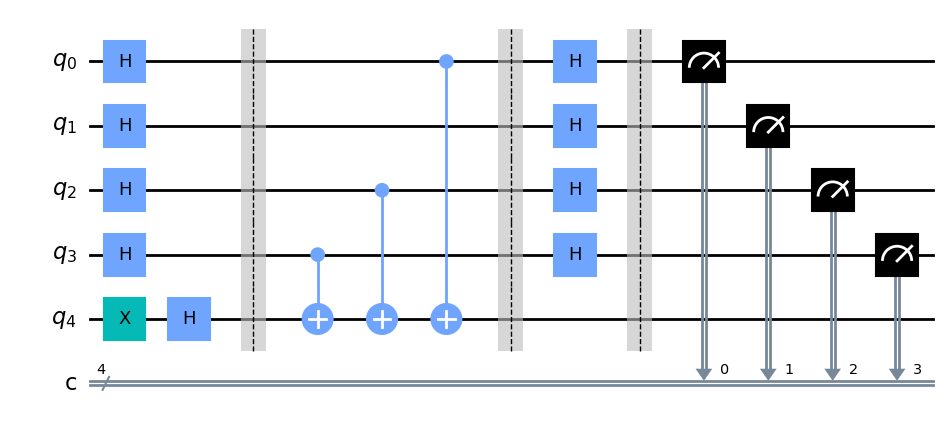

In [7]:
ckt = QuantumCircuit(n+1,n)

for gate in range(n):
    ckt.h(gate)

ckt.x(n)
ckt.h(n)

ckt.barrier()


for gate in range(n-1,-1,-1):
    if s[gate] == '1':
        ckt.cx(gate,n)
     

ckt.barrier()

for gate in range(n):
    ckt.h(gate)

ckt.barrier()

for gate in range(n):
    ckt.measure(gate,gate)


ckt.draw('mpl')

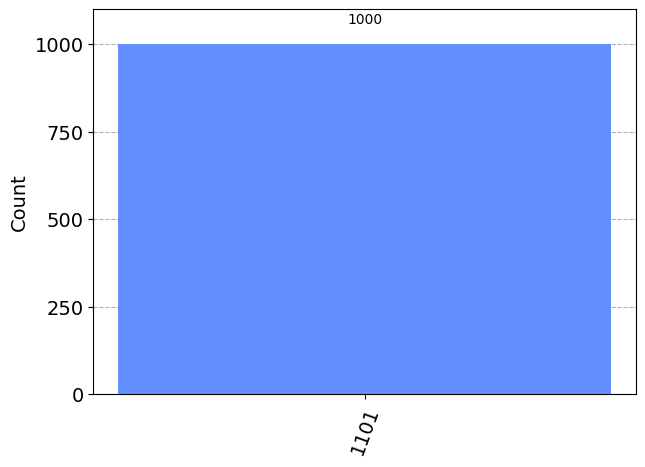

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1000
results = execute(ckt, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)